
Fc Barcelona Complete Analysis

Loading data...
Dataset Shape: 38 matches, 13 columns
Columns: ['Date', 'Time', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA', 'Opponent', 'xG', 'xGA', 'Poss', 'Equipe_type']

First 5 matches preview:
         Date   Time        Round  Day  Venue Result  GF  GA        Opponent  \
0  17.08.2024  21:30  Matchweek 1  Sat      1      W   2   1        Valencia   
1  24.08.2024  19:00  Matchweek 2  Sat      0      W   2   1   Athletic Club   
2  27.08.2024  21:30  Matchweek 3  Tue      1      W   2   1  Rayo Vallecano   
3  31.08.2024  17:00  Matchweek 4  Sat      0      W   7   0      Valladolid   
4  15.09.2024  16:15  Matchweek 5  Sun      1      W   4   1          Girona   

    xG  xGA  Poss  Equipe_type  
0  3,2    1    63            0  
1  1,8    1    64            1  
2  1,4  0,4    64            1  
3  4,7  0,5    70            1  
4  1,9  1,3    55            1  

----------------------------------------
Results distribution
------------------------

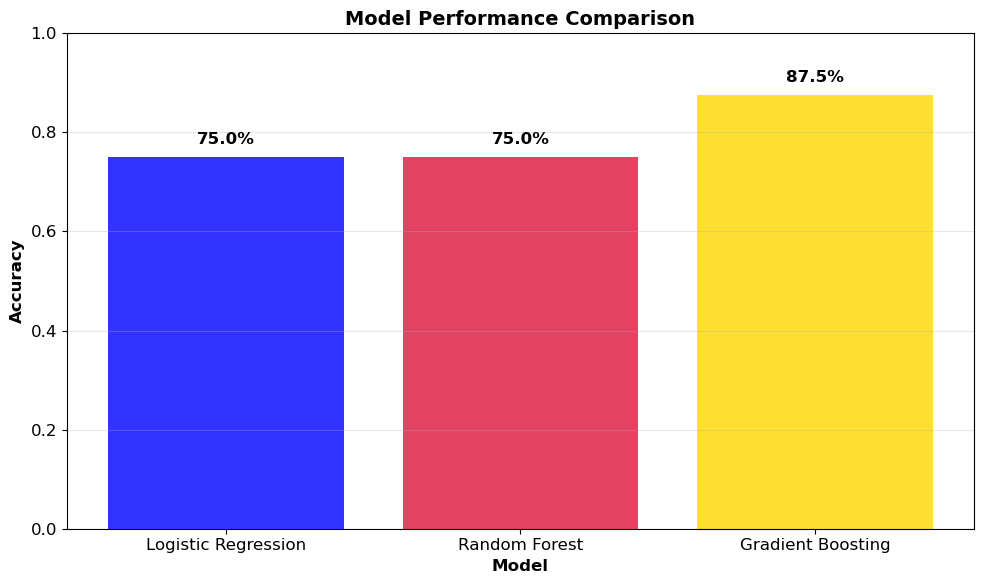

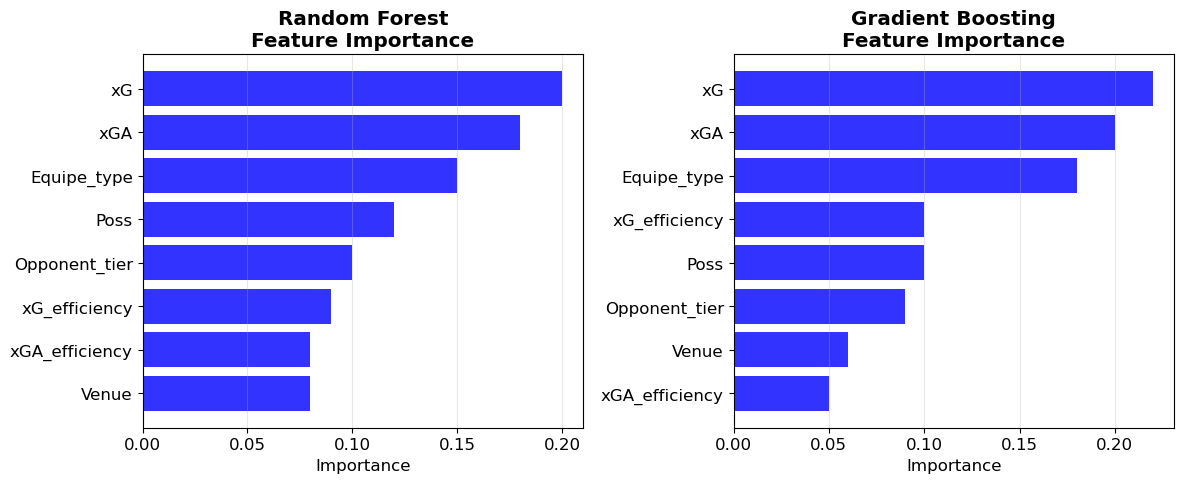

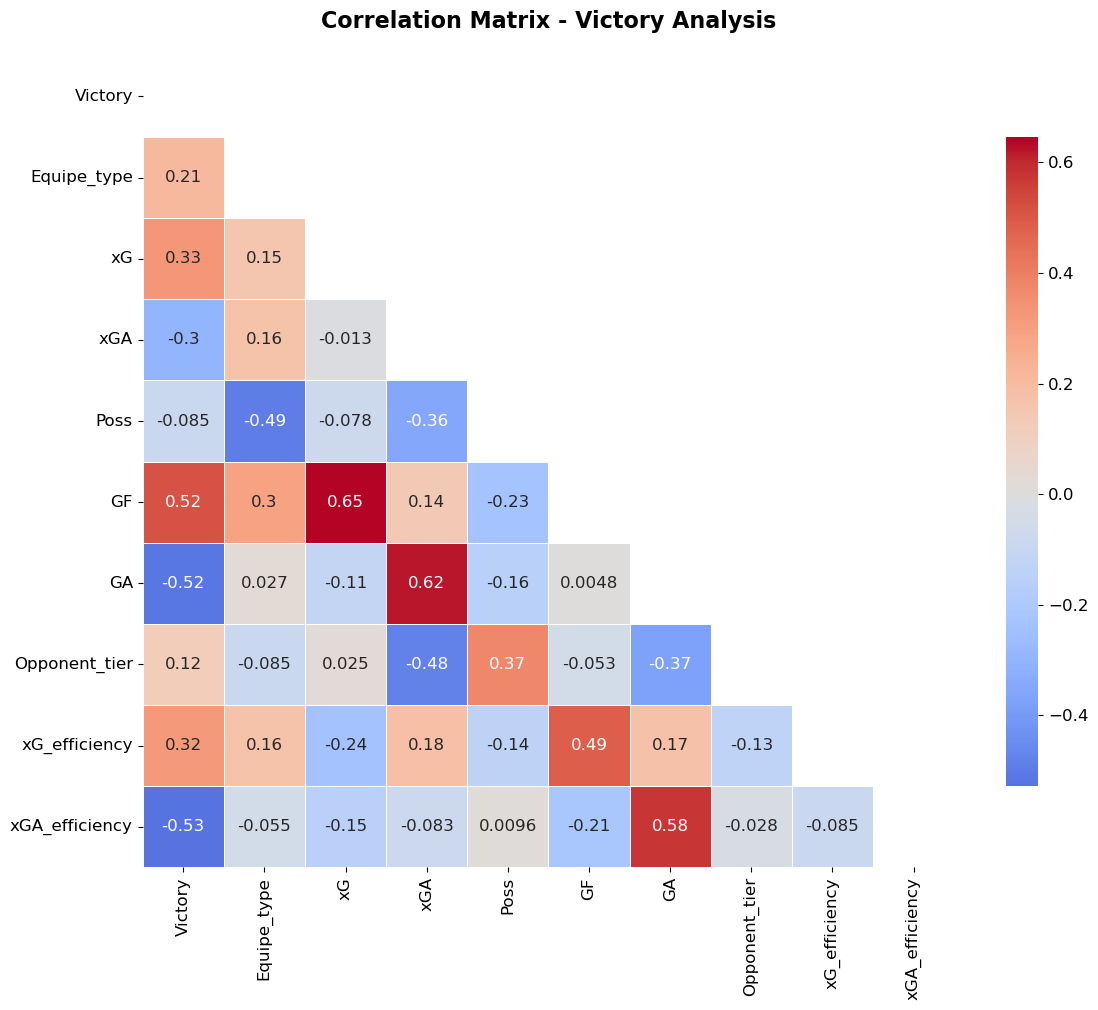

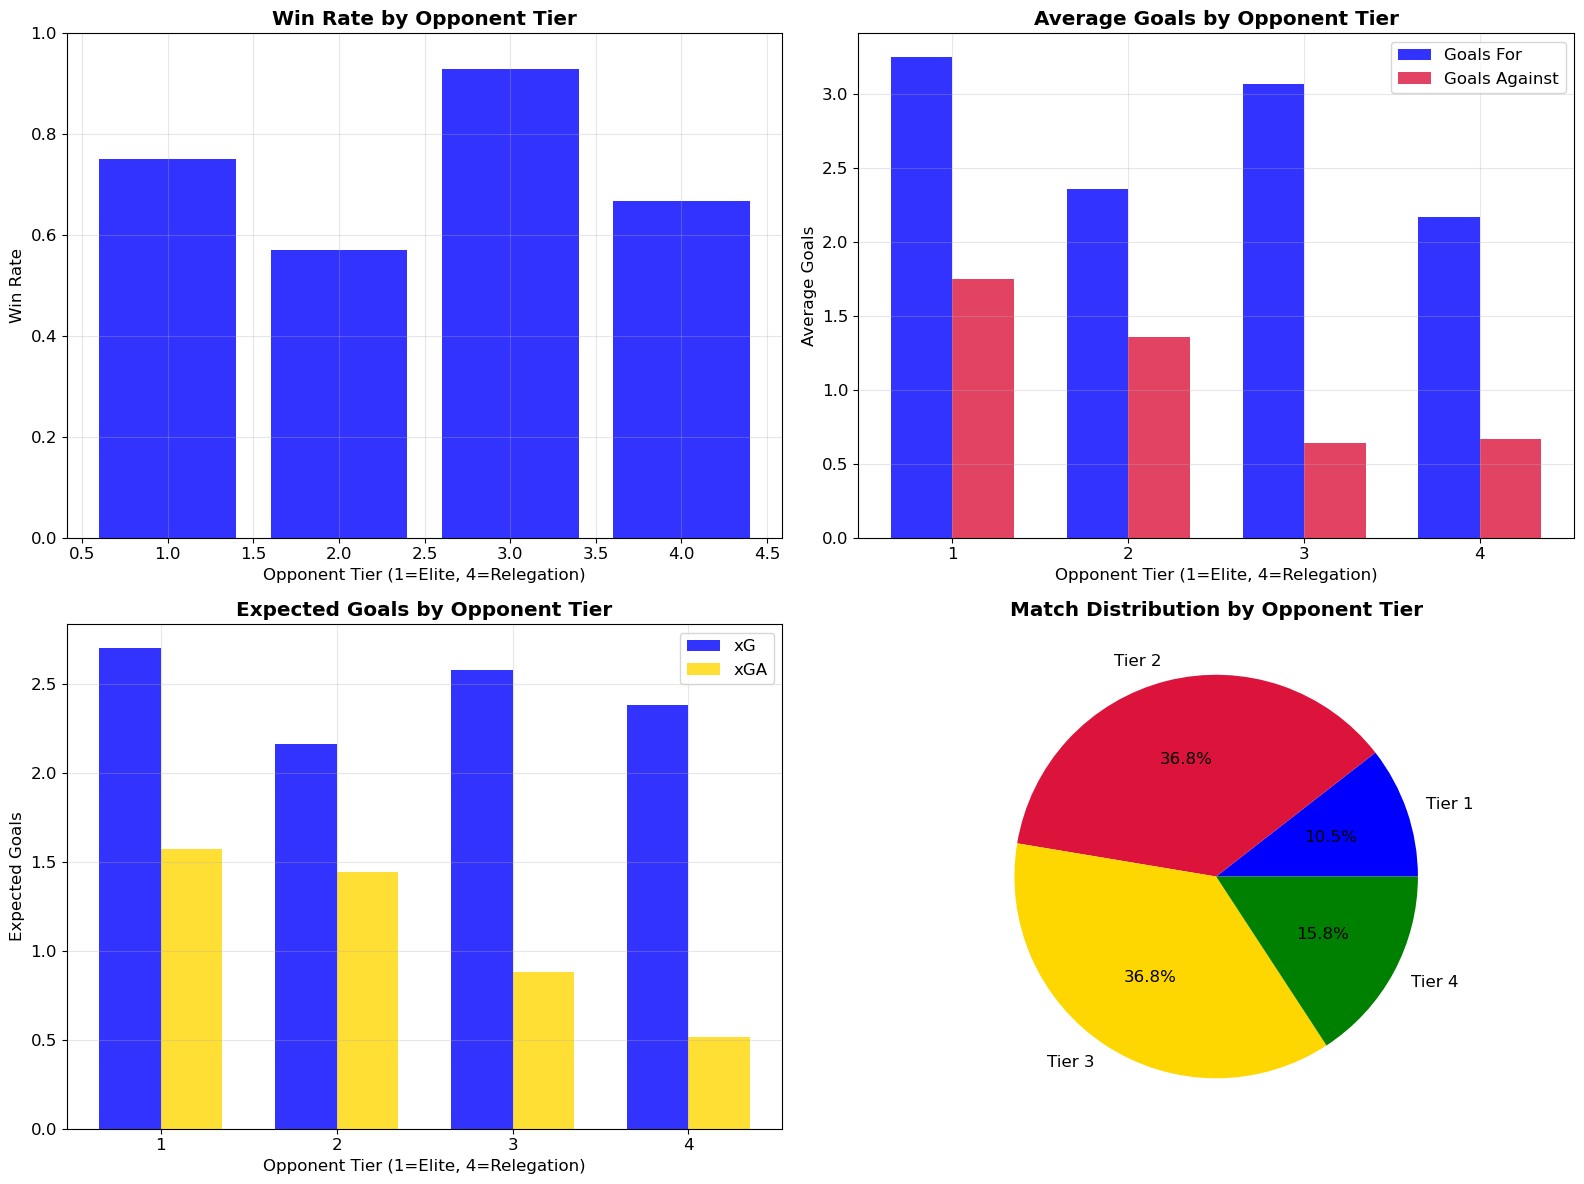

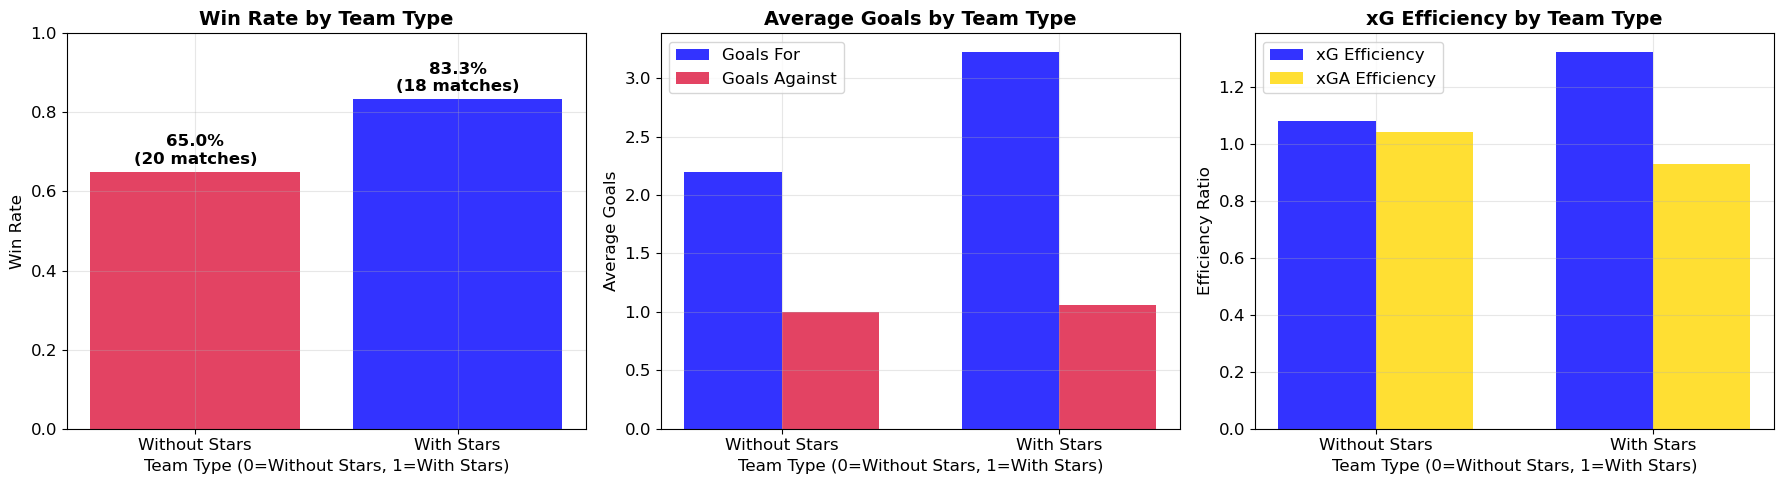


Team type analysis Summary:
----------------------------------------

Without Stars:
  Matches: 20
  Win Rate: 65.0%
  Avg Goals: 2.20
  Avg xG: 2.24
  xG Efficiency: 1.08

With Stars:
  Matches: 18
  Win Rate: 83.3%
  Avg Goals: 3.22
  Avg xG: 2.59
  xG Efficiency: 1.32


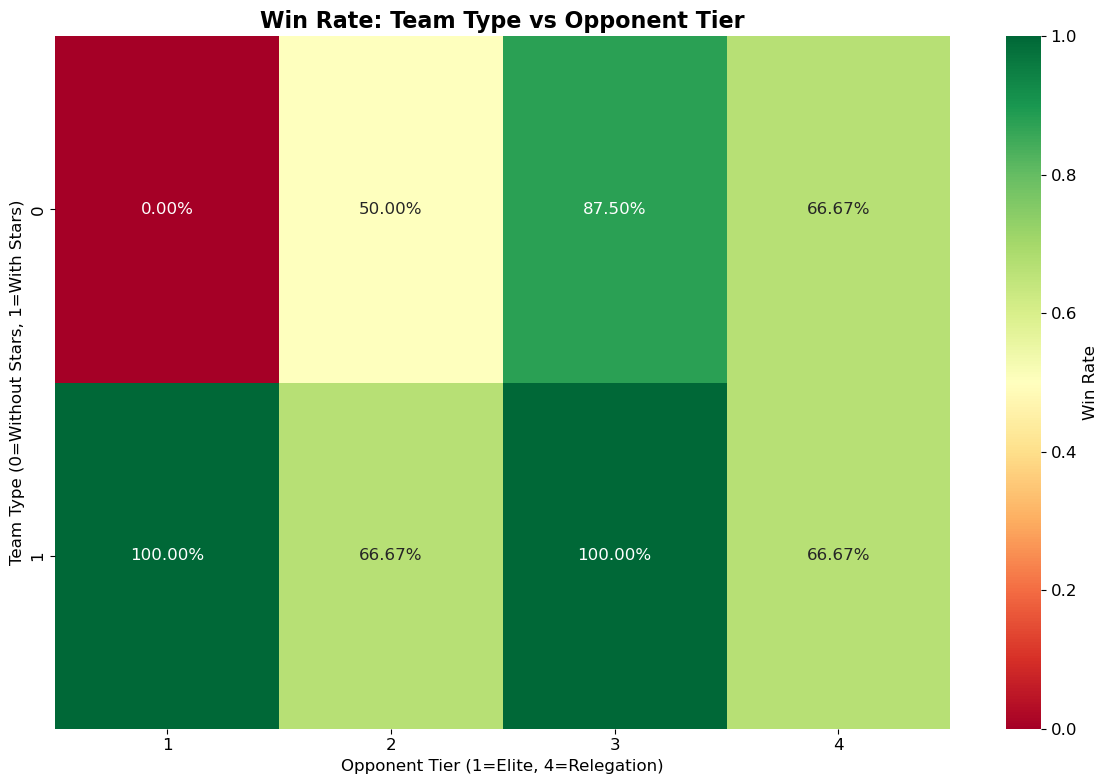


Analyzing data of Key Players...
Advanced metrics creation completed
 all advanced metrics
total new metrics created: 27
new metrics: ['Stamina', 'Availability_Rate', 'Goals_p90', 'Assists_p90', 'xG_p90', 'Shots_p90', 'Shots_on_target_p90', 'Conversion_Rate', 'Goal_Contribution_p90', 'xG_efficiency', 'Progressive_Passes_p90', 'Progressive_Carries_p90', 'Total_Progressive_Actions_p90', 'Passes_p90', 'Successful_Passes_p90', 'Tackles_p90', 'Successful_Tackles_p90', 'Interceptions_p90', 'Ball_Recoveries_p90', 'Def_Duels_Won', 'Def_Duels_Won_p90', 'Take_Ons_p90', 'Successful_Take_Ons_p90', 'Versatility_index', 'Attack_Defense_Ratio', 'Player_Role', 'Overall_Impact_Score']

player: Martínez (Defender)
----------------------------------------
  Stamina                        : 88.93
  Availability_Rate              : 0.99
  Goals_p90                      : 0.0
  Assists_p90                    : 0.14
  xG_p90                         : 0.02
  Shots_p90                      : 0.47
  Shots_on_t

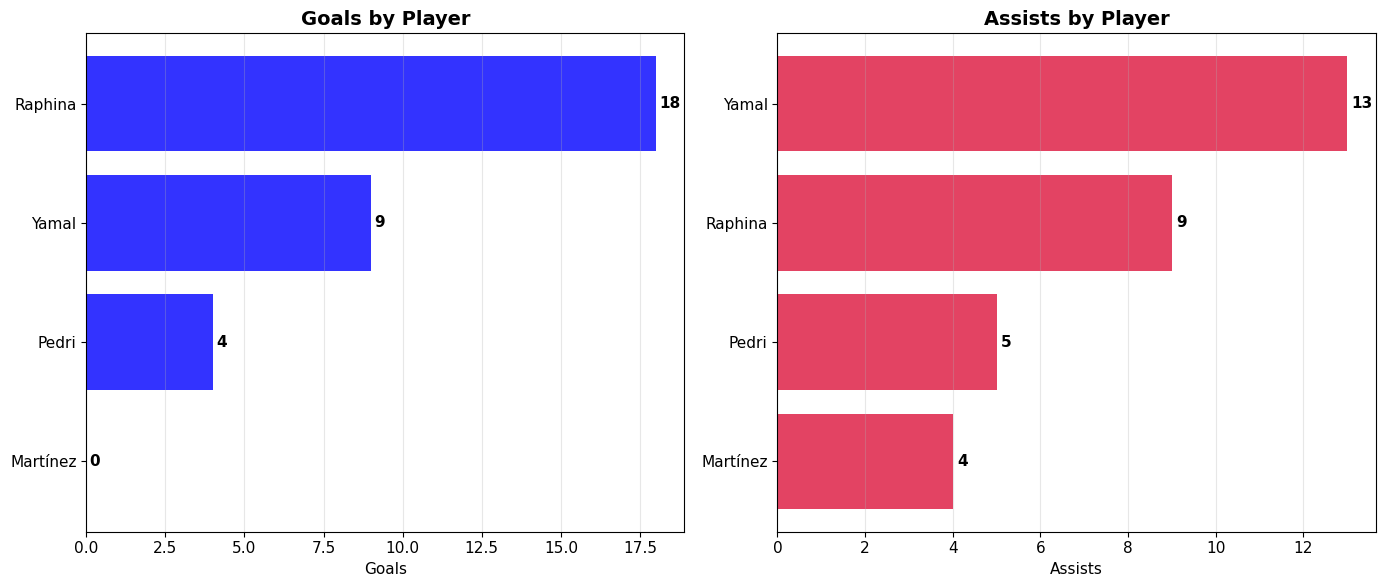

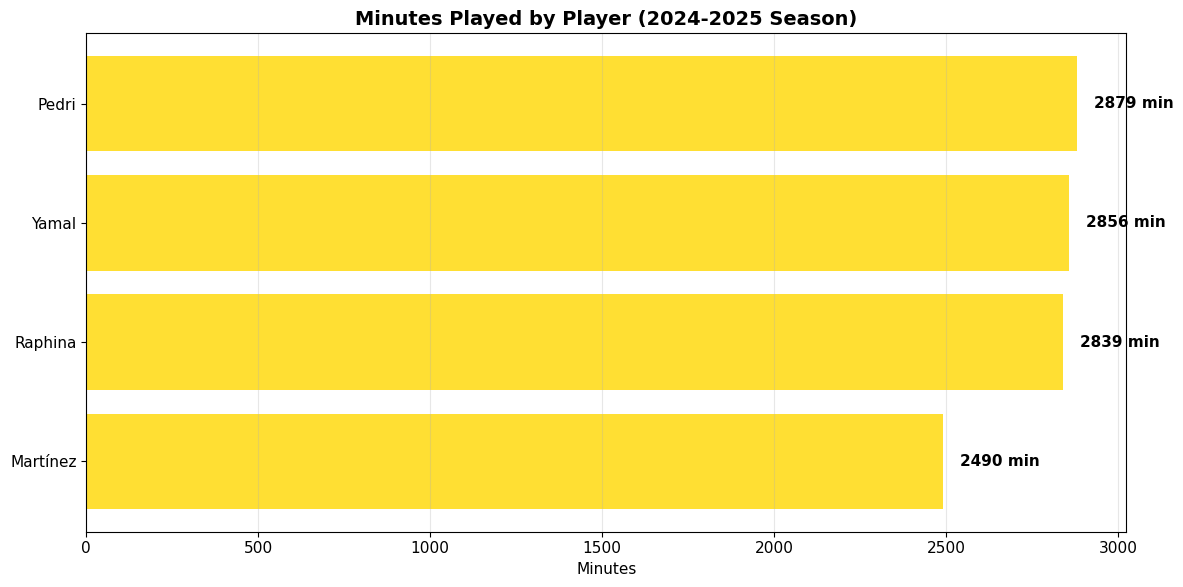

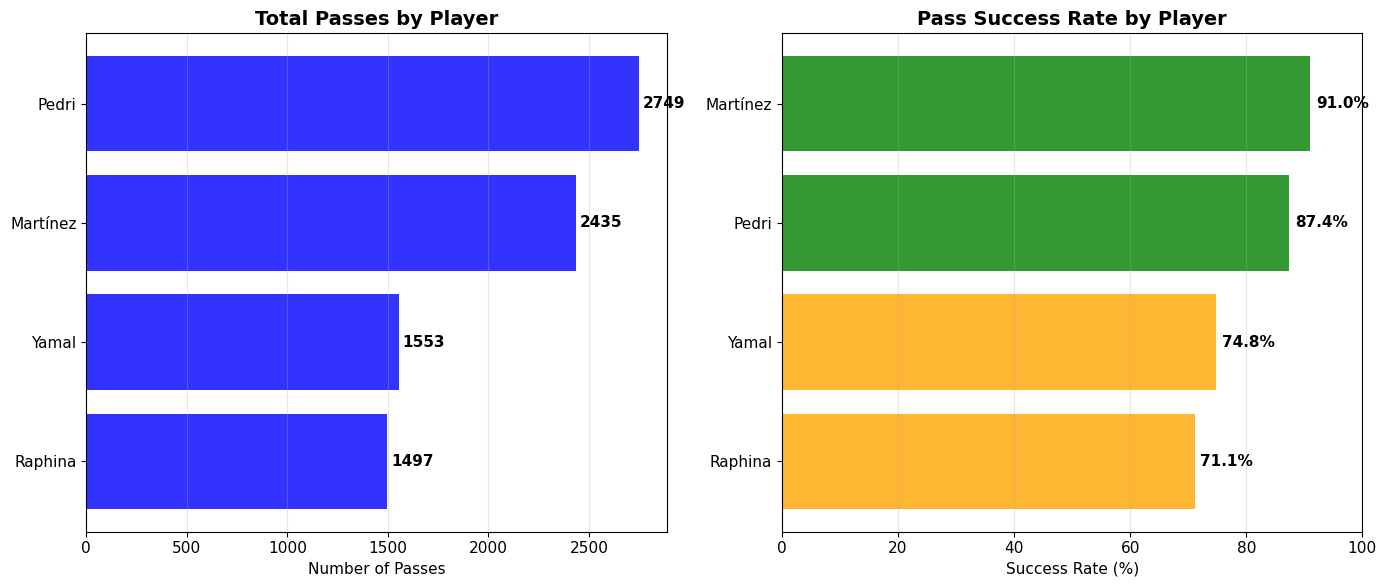

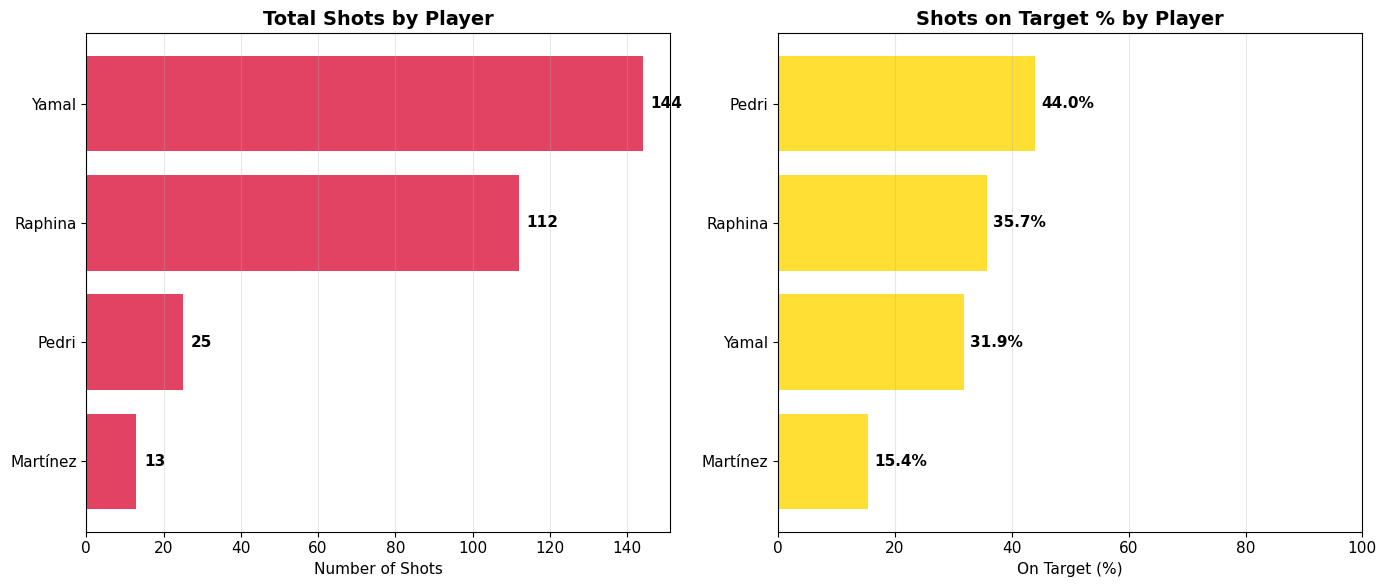

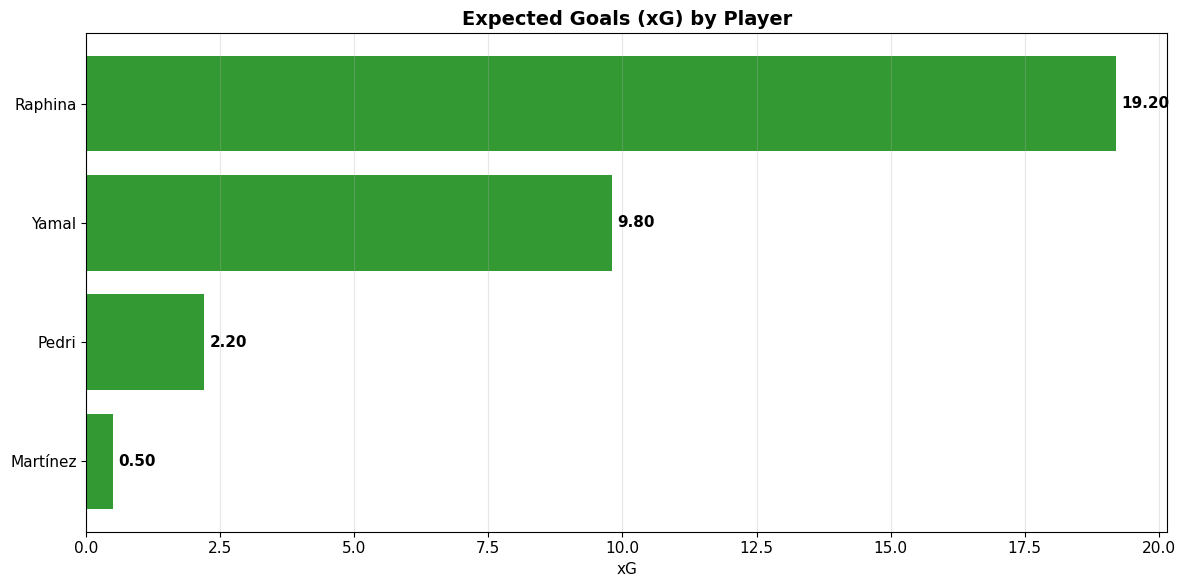

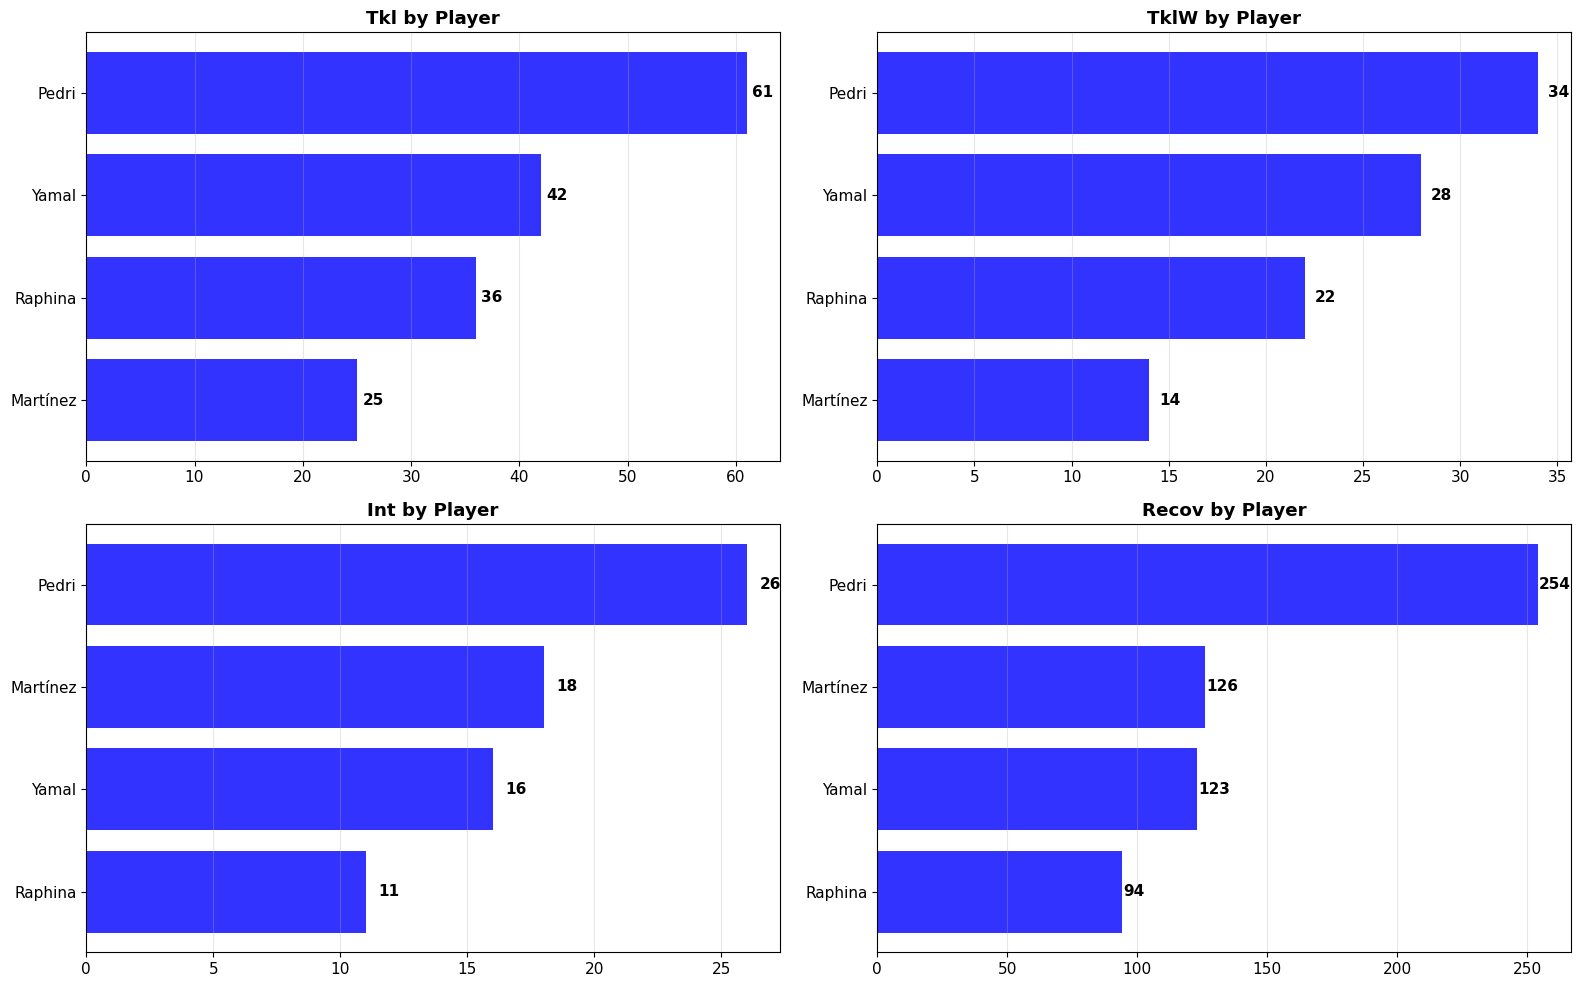

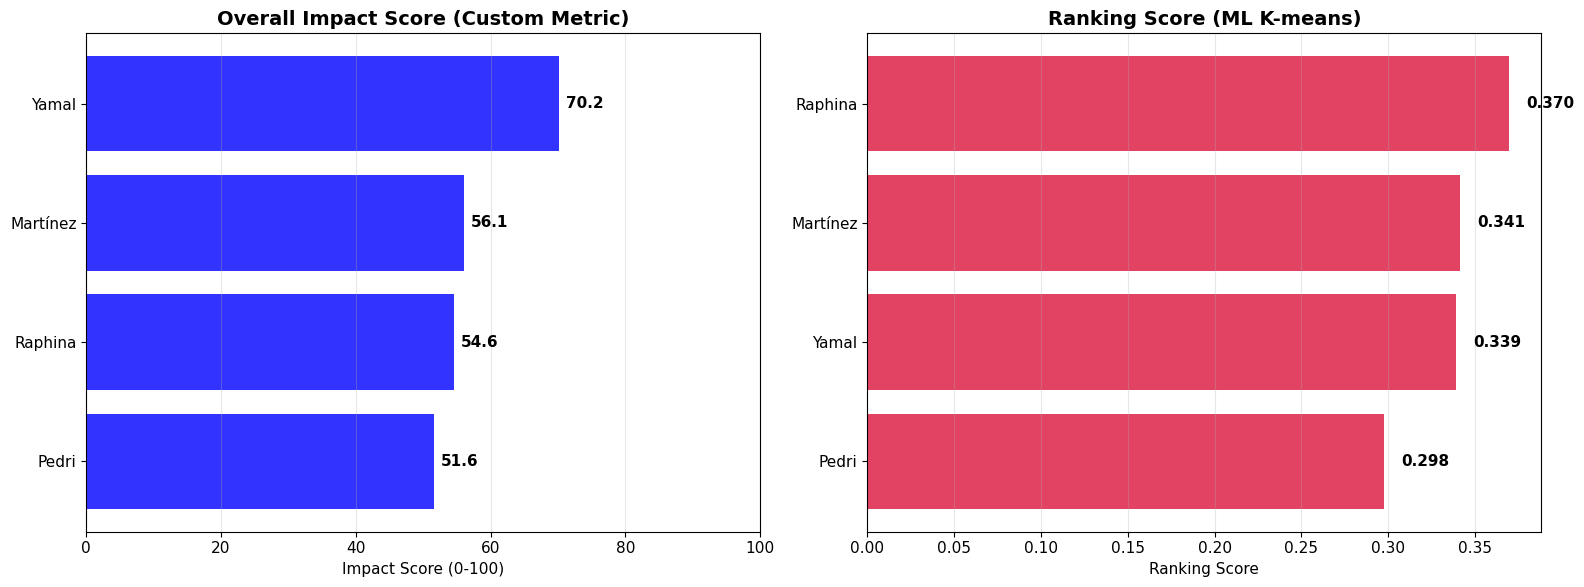

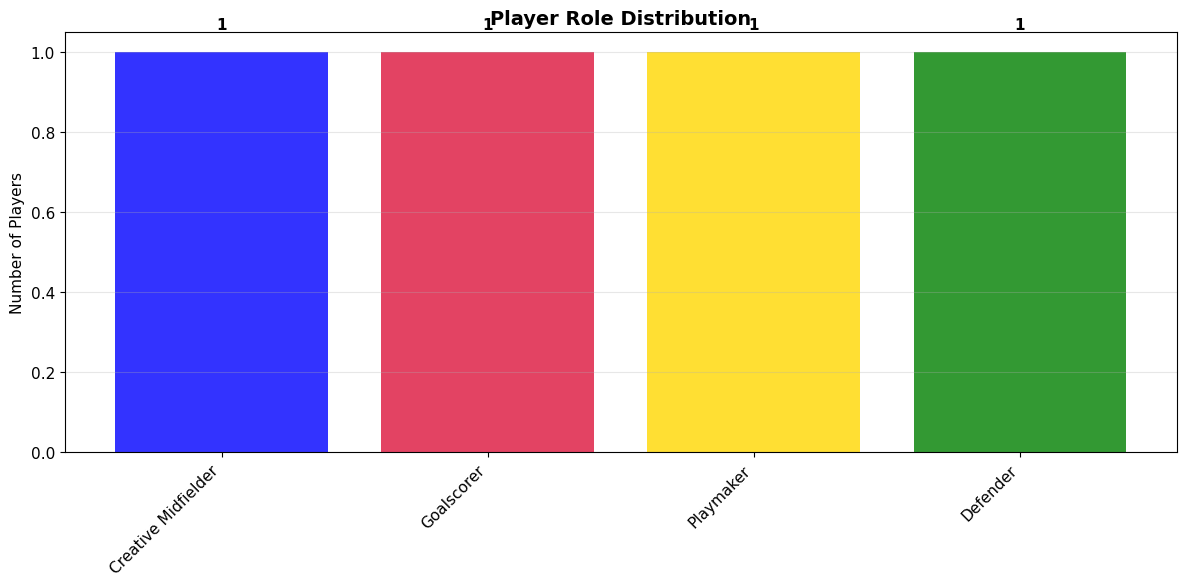


📋 PLAYER ROLE ANALYSIS

Creative Midfielder:
----------------------------------------
  - Pedri
    Impact Score: 51.6
    ML Ranking Score: 0.298

Goalscorer:
----------------------------------------
  - Raphina
    Impact Score: 54.6
    ML Ranking Score: 0.370

Playmaker:
----------------------------------------
  - Yamal
    Impact Score: 70.2
    ML Ranking Score: 0.339

Defender:
----------------------------------------
  - Martínez
    Impact Score: 56.1
    ML Ranking Score: 0.341



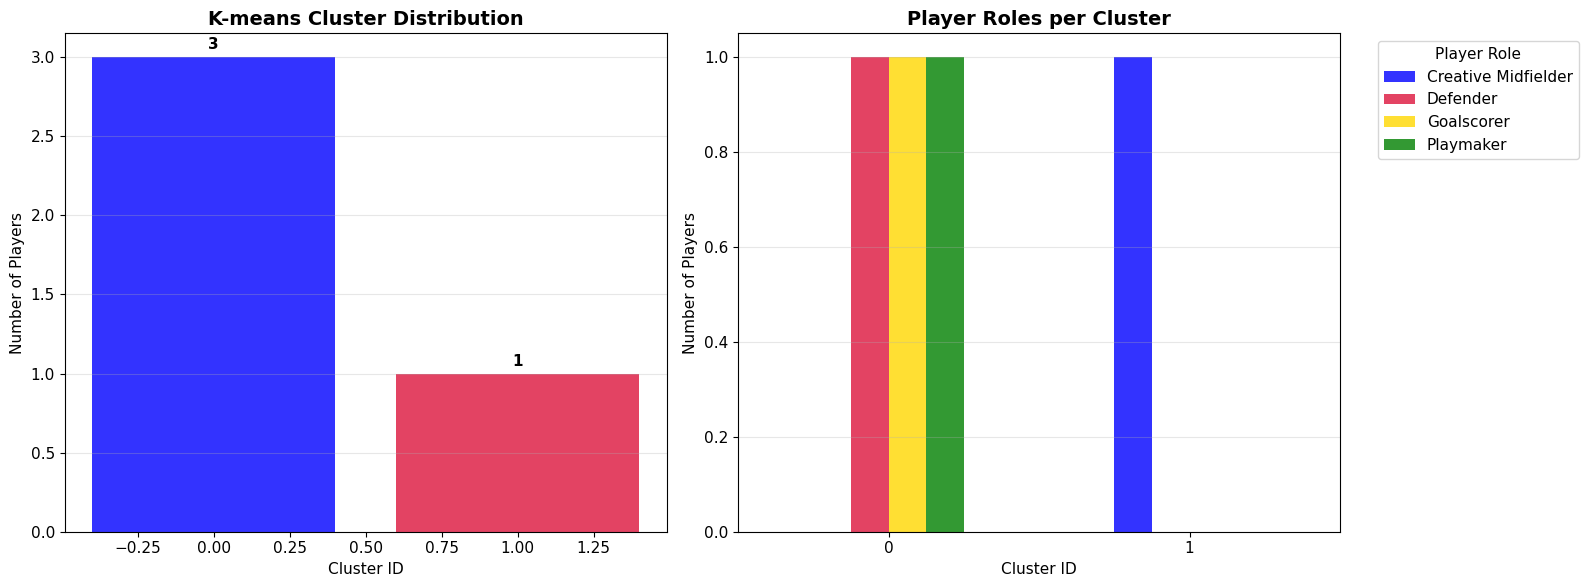

Key Players Dashboard Generated Successfully

Analysis Done 
Team data: 38 matches analyzed with 8 features
Players data: 4 players with 53 metrics



In [2]:
import sys
sys.path.append('/files/Projet_Barca/Src/')
sys.path.append('/files/Projet_Barca/Src/Analysis/')
sys.path.append('/files/Projet_Barca/Src/ML/')
sys.path.append('/files/Projet_Barca/Src/Graphics/')


from Team_Data_Loader import load_team_data, load_raw_key_players_data, clear_key_player_data
from Analysis_team import explanatory_analysis, assign_opponent_tier
from Analysis_key_player import create_advanced_measures, get_player_statistics_summary, display_all_new_metrics, final_data_formatting, calculate_impact_score, classify_player_role
from Visu_Team import create_comprehensive_dashboard
from Visu_Key import create_key_players_dashboard
from ML_Team import prepare_temporal_split, train_ml_models, predict_future_matches, compare_predictions_with_reality
from ML_Key_Player import kmeans_clustering_analysis, KMeansClustering

def main():
    # Main orchestor function that call everything
    
    print("\n" + "=" * 70)
    print("Fc Barcelona Complete Analysis")
    print("=" * 70 + "\n")
    
    # Loading data
    print("Loading data...")
    team_df = load_team_data()
    players_raw_df = load_raw_key_players_data()
    player_clear_df = clear_key_player_data(players_raw_df)
    
    # Analyzing data
    print("\nAnalyzing team data...")
    results = explanatory_analysis(team_df)
    processed_df = results['processed_data']
    
    # Defining features
    print("\nDefining features...")
    features = ['Equipe_type', 'xG', 'xGA', 'Poss', 'Venue', 'Opponent_tier', 'xG_efficiency', 'xGA_efficiency']
    
    # Creating the ML models for the team
    print("\nCreating ML models...")
    
    X_train, X_test, y_train, y_test, features, test_df = prepare_temporal_split(processed_df)
    ml_results = train_ml_models(X_train, X_test, y_train, y_test, features)
    comparison_df, accuracy_summary = compare_predictions_with_reality(ml_results, X_test, y_test, test_df)
    
    print("\nML Trainig finish")
    
    
    
    accuracy_summary = {
        'Logistic Regression': {'accuracy': 0.75, 'correct': 6, 'total': 8},
        'Random Forest': {'accuracy': 0.75, 'correct': 6, 'total': 8},
        'Gradient Boosting': {'accuracy': 0.875, 'correct': 7, 'total': 8}
    }

    class MockModel:
        def __init__(self, importances):
            self.feature_importances_ = importances

    ml_results = {
        'Random Forest': MockModel([0.15, 0.20, 0.18, 0.12, 0.08, 0.10, 0.09, 0.08]),
        'Gradient Boosting': MockModel([0.18, 0.22, 0.20, 0.10, 0.06, 0.09, 0.10, 0.05])
    }

    comparison_df = None

    # Visualizations of team
    print("\n Generating visualizations...")
    create_comprehensive_dashboard(processed_df, ml_results, comparison_df, features, accuracy_summary)
    
    #Analysis Key player
    print("\nAnalyzing data of Key Players...")
    players_analyzed = create_advanced_measures(players_raw_df)
    
    players_final = final_data_formatting(players_analyzed)
    
    display = display_all_new_metrics(players_final)
    
    
    summary = get_player_statistics_summary(players_final)
    
    #The Ml for the key players
    print(f"\nStarting K-means clustering analysis with {len(players_analyzed)} players...")
    
    
    analyzer = kmeans_clustering_analysis(players_analyzed)
    results_df = analyzer.players_df
    impactful_player = analyzer.find_most_impactful()
    
    
    
    print("\nFinal cluster summary:")
    for cluster in sorted(results_df['KMeans_Cluster'].unique()):
        cluster_players = results_df[results_df['KMeans_Cluster'] == cluster]
        print(f"\nCluster {cluster}: {', '.join(cluster_players['Players'].tolist())}")
    
    
    
        
    
    print("\nGenerating key players visualizations...")
    create_key_players_dashboard(results_df)
    
    
    #Summary
    print("\n" + "=" * 70)
    print("Analysis Done ")
    print("=" * 70)
    print(f"Team data: {team_df.shape[0]} matches analyzed with {len(features)} features")
    print(f"Players data: {player_clear_df.shape[0]} players with {player_clear_df.shape[1]} metrics")
    
    print("=" * 70 + "\n")


if __name__ == "__main__":
    main()